In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Data preprocess and clean up

In [242]:
## encoding https://stackoverflow.com/questions/17912307/u-ufeff-in-python-string
with open("dataset/DatiumTrain.rpt", "r", encoding="utf-8-sig") as fr: 
    train = fr.readlines()

# Prepare columns and data to a dataframe
columns = [col.replace("\n", "") for col in train[0].split("\t")]
data = [line.split("\t") for line in train[1:]]

df = pd.DataFrame(data, columns=columns)

# More Clean up and conversion to float
df.loc[:,'Sold_Amount'] = df['Sold_Amount'].str.strip("\n").replace('NULL', np.nan).astype(float)

# exluding columns
exclude_cols = ['AvgWholesale', 'AvgRetail', 'GoodWholesale', 'GoodRetail', 'TradeMin', 'TradeMax', 'PrivateMax']
df_train = df[df.columns[~df.columns.isin(exclude_cols)]].copy()
# df_train.columns.tolist()

# Export file, can use it for analysis and ml model training 
# df_train.to_excel("dataset/trainset.xlsx", index=False)
# df_train.to_csv("dataset/trainset.csv", index=False)

In [254]:
df_train = df_train.replace("NULL", np.nan)
df_train.head()

,Make,Model,MakeCode,FamilyCode,YearGroup,MonthGroup,SequenceNum,Description,CurrentRelease,ImportFlag,...,GoodKM,NewPrice,Colour,Branch,SaleCategory,Sold_Date,Compliance_Date,Age_Comp_Months,KM,Sold_Amount
0,Holden,Commodore,HOLD,COMMODO,2008,0,0,VE Omega Sedan 4dr. Auto 4sp 3.6i,F,L,...,140,34790,White,Perth (WA),Auction,2015-11-03 00:00:00.000,02/2008,93,227878,2000.0
1,Holden,Commodore,HOLD,COMMODO,1993,7,41,VR Executive Wagon 5dr. Auto 4sp 3.8i,F,L,...,360,27978,Red,Belmore (NSW),Auction,2000-10-18 00:00:00.000,08/1993,86,153091,6800.0
2,Toyota,RAV4,TOYO,RAV4,2012,0,6,ACA33R MY12 CV Wagon 5dr Man 5sp 4x4 2.4i,F,L,...,80,31990,040 - Glacier White (T),Sunshine (VIC),Dealer Only Auction,2014-02-05 00:00:00.000,10/2012,16,27374,22900.0
3,Holden,Commodore,HOLD,COMMODO,2007,0,11,VZ@VE MY07 Executive Wagon 5dr. Auto 4sp 3.6i,F,L,...,150,35990,Quicksilver,Belmore (NSW),Auction,2011-01-10 00:00:00.000,01/2007,48,99452,10500.0
4,Toyota,Tarago,TOYO,TARAGO,2007,0,0,ACR50R GLi Wagon 8st 5dr Spts Auto 4sp 2.4i,F,L,...,150,49490,Silver,Hobart (TAS),Special Fixed Price,2009-05-23 00:00:00.000,01/2007,28,44355,31320.0


### Sold_Amount

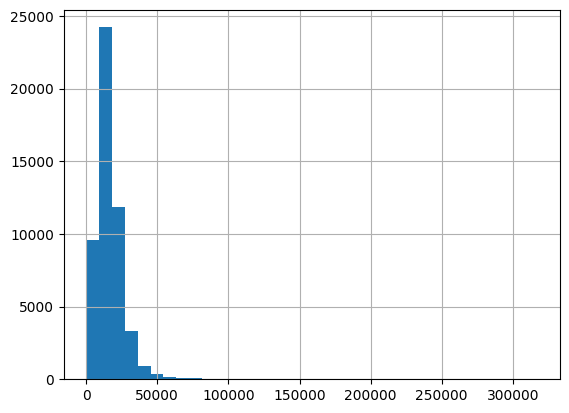

In [244]:
df_train['Sold_Amount'].hist(bins=35);

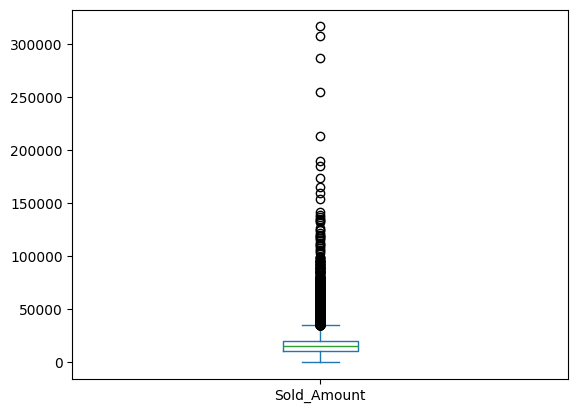

In [245]:
df_train['Sold_Amount'].plot.box();

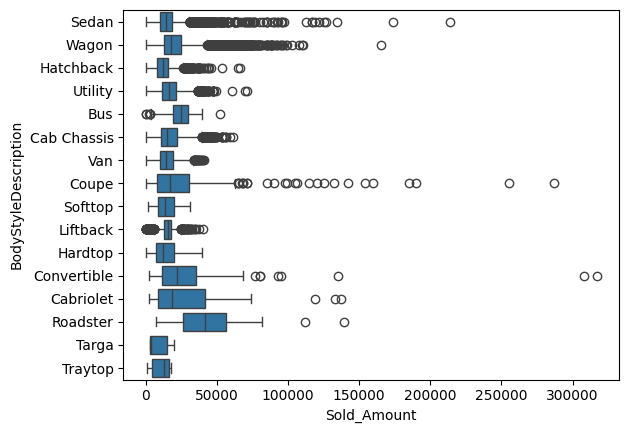

In [246]:
sns.boxplot(data=df_train, x="Sold_Amount", y="BodyStyleDescription");

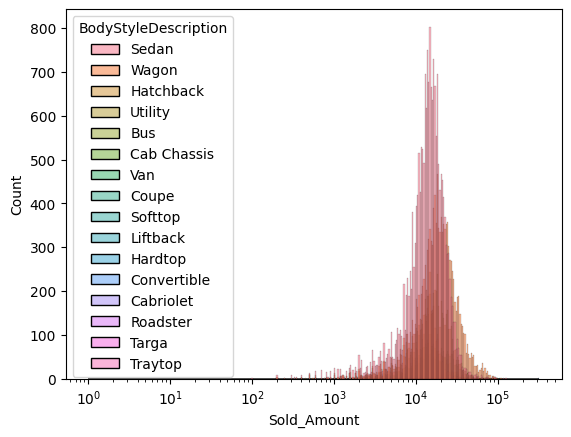

In [247]:
sns.histplot(data=df_train, x="Sold_Amount", hue="BodyStyleDescription", log_scale=True);

In [256]:
df_train['Sold_Amount']=df_train['Sold_Amount'].astype(float)

In [255]:
np.log(df_train['Sold_Amount'] + 1)

0         7.601402
1         8.824825
2        10.038936
3         9.259226
4        10.352044
           ...    
50699     8.146419
50700     9.367430
50701     9.059634
50702     9.441531
50703          NaN
Name: Sold_Amount, Length: 50704, dtype: float64

## Convert columns to best possible data types

In [257]:
df_train = df_train.convert_dtypes()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Columns: 123 entries, Make to Sold_Amount
dtypes: Float64(1), Int64(5), string(117)
memory usage: 47.9 MB


## Handling Missing Data

### Missing data - checking Int Columns

In [258]:
df_train.select_dtypes(int).isna().sum().index

Index(['AltEngTorqueFrom', 'NormalChargeMins', 'QuickChargeMins',
       'NormalChargeVoltage', 'QuickChargeVoltage'],
      dtype='object')

In [259]:
# Remove these columns with 100% missing data
columns_with_nulls_only = ['AltEngTorqueFrom', 'NormalChargeMins', 'QuickChargeMins', 'NormalChargeVoltage', 'QuickChargeVoltage']
df_train[columns_with_nulls_only].isna().sum()

AltEngTorqueFrom       50704
NormalChargeMins       50704
QuickChargeMins        50704
NormalChargeVoltage    50704
QuickChargeVoltage     50704
dtype: int64

In [262]:
df_train.drop(columns=columns_with_nulls_only, inplace=True)

### Filter out column with too much missing data

In [110]:
# String type Missing values more than certain threshold
threshold = 0.5
df_train.select_dtypes('string').isna().sum().index[
    (df_train.select_dtypes('string').isna().sum() / df_train.shape[0] ) < threshold].tolist()

['Make',
 'Model',
 'MakeCode',
 'FamilyCode',
 'YearGroup',
 'MonthGroup',
 'SequenceNum',
 'Description',
 'CurrentRelease',
 'ImportFlag',
 'LimitedEdition',
 'Series',
 'BadgeDescription',
 'BodyStyleDescription',
 'DriveDescription',
 'DriveCode',
 'GearTypeDescription',
 'GearLocationDescription',
 'GearNum',
 'DoorNum',
 'EngineSize',
 'EngineDescription',
 'Cylinders',
 'FuelTypeDescription',
 'InductionDescription',
 'OptionCategory',
 'CamDescription',
 'EngineTypeDescription',
 'FuelCapacity',
 'FuelDeliveryDescription',
 'MethodOfDeliveryDescription',
 'GrossVehicleMass',
 'VIN',
 'WheelBase',
 'Height',
 'Length',
 'Width',
 'KerbWeight',
 'TareMass',
 'PayLoad',
 'Power',
 'PowerRPMTo',
 'Torque',
 'TorqueRPMTo',
 'RonRating',
 'SeatCapacity',
 'ModelCode',
 'BuildCountryOriginDescription',
 'ValvesCylinder',
 'EngineCycleDescription',
 'EngineConfigurationDescription',
 'EngineLocation',
 'EngineNum',
 'FrontTyreSize',
 'RearTyreSize',
 'FrontRimDesc',
 'RearRimDesc',
 '

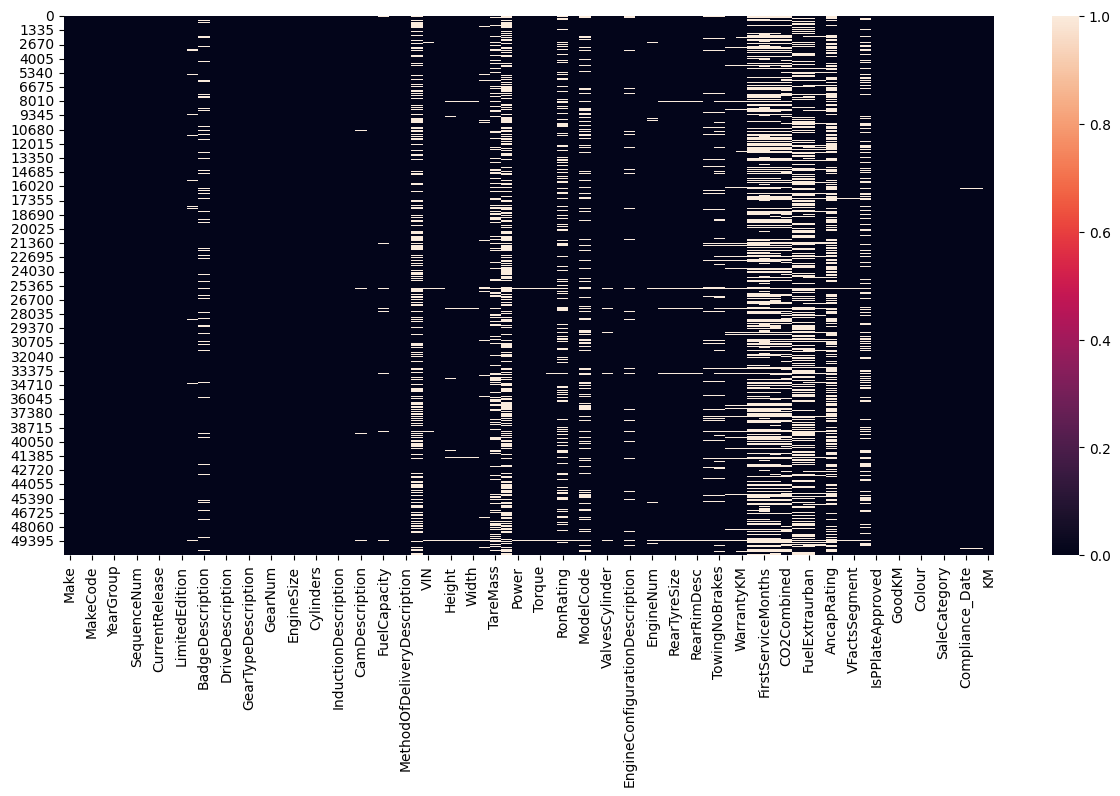

In [111]:
plt.figure(figsize=(15,7))

sns.heatmap(df_train[[
                     'Make',
                     'Model',
                     'MakeCode',
                     'FamilyCode',
                     'YearGroup',
                     'MonthGroup',
                     'SequenceNum',
                     'Description',
                     'CurrentRelease',
                     'ImportFlag',
                     'LimitedEdition',
                     'Series',
                     'BadgeDescription',
                     'BodyStyleDescription',
                     'DriveDescription',
                     'DriveCode',
                     'GearTypeDescription',
                     'GearLocationDescription',
                     'GearNum',
                     'DoorNum',
                     'EngineSize',
                     'EngineDescription',
                     'Cylinders',
                     'FuelTypeDescription',
                     'InductionDescription',
                     'OptionCategory',
                     'CamDescription',
                     'EngineTypeDescription',
                     'FuelCapacity',
                     'FuelDeliveryDescription',
                     'MethodOfDeliveryDescription',
                     'GrossVehicleMass',
                     'VIN',
                     'WheelBase',
                     'Height',
                     'Length',
                     'Width',
                     'KerbWeight',
                     'TareMass',
                     'PayLoad',
                     'Power',
                     'PowerRPMTo',
                     'Torque',
                     'TorqueRPMTo',
                     'RonRating',
                     'SeatCapacity',
                     'ModelCode',
                     'BuildCountryOriginDescription',
                     'ValvesCylinder',
                     'EngineCycleDescription',
                     'EngineConfigurationDescription',
                     'EngineLocation',
                     'EngineNum',
                     'FrontTyreSize',
                     'RearTyreSize',
                     'FrontRimDesc',
                     'RearRimDesc',
                     'TowingBrakes',
                     'TowingNoBrakes',
                     'WarrantyYears',
                     'WarrantyKM',
                     'FirstServiceKM',
                     'FirstServiceMonths',
                     'RegServiceMonths',
                     'CO2Combined',
                     'FuelUrban',
                     'FuelExtraurban',
                     'FuelCombined',
                     'AncapRating',
                     'VFactsClass',
                     'VFactsSegment',
                     'VFactsPrice',
                     'IsPPlateApproved',
                     'AverageKM',
                     'GoodKM',
                     'NewPrice',
                     'Colour',
                     'Branch',
                     'SaleCategory',
                     'Sold_Date',
                     'Compliance_Date',
                     'Age_Comp_Months',
                     'KM']].isna());

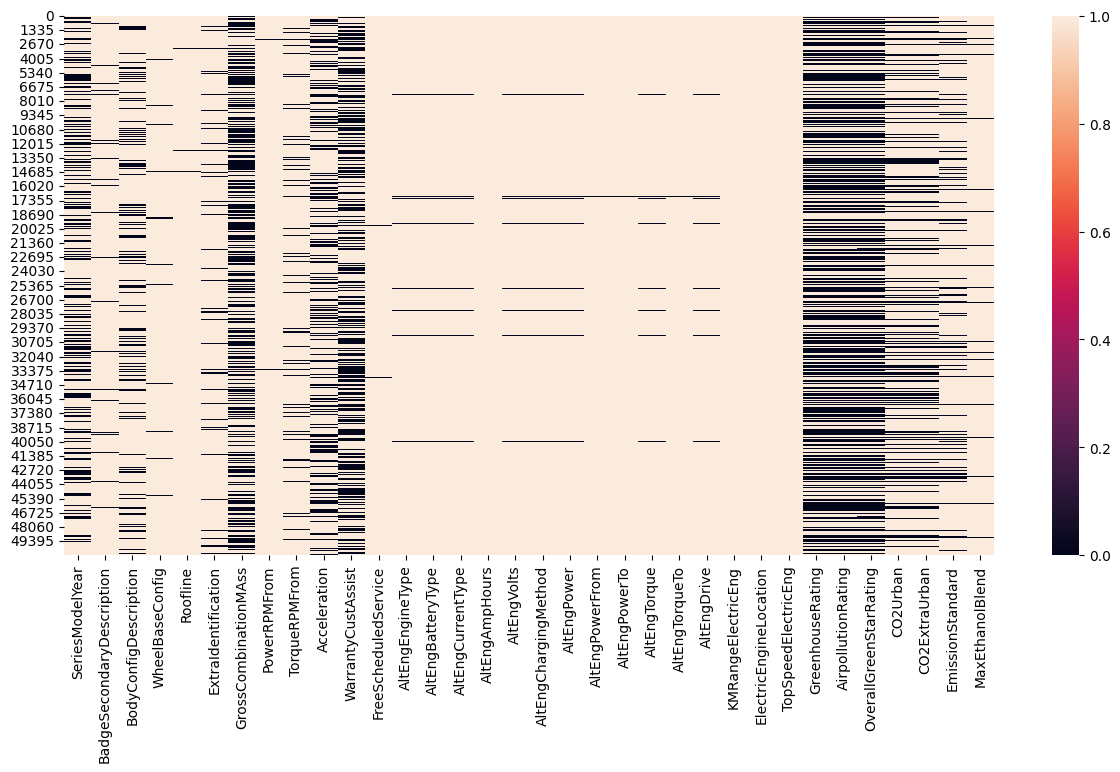

In [106]:
# Columns missing more than 50% values
plt.figure(figsize=(15,7))
sns.heatmap(df_train[['SeriesModelYear', 'BadgeSecondaryDescription', 'BodyConfigDescription',
       'WheelBaseConfig', 'Roofline', 'ExtraIdentification',
       'GrossCombinationMAss', 'PowerRPMFrom', 'TorqueRPMFrom', 'Acceleration',
       'WarrantyCustAssist', 'FreeScheduledService', 'AltEngEngineType',
       'AltEngBatteryType', 'AltEngCurrentType', 'AltEngAmpHours',
       'AltEngVolts', 'AltEngChargingMethod', 'AltEngPower', 'AltEngPowerFrom',
       'AltEngPowerTo', 'AltEngTorque', 'AltEngTorqueTo', 'AltEngDrive',
       'KMRangeElectricEng', 'ElectricEngineLocation', 'TopSpeedElectricEng',
       'GreenhouseRating', 'AirpollutionRating', 'OverallGreenStarRating',
       'CO2Urban', 'CO2ExtraUrban', 'EmissionStandard', 'MaxEthanolBlend']].isna());

### VIN

In [ ]:
# VIN unique, won't use in model training. 
# Altho some vin showing repeated, belieave is masked
df_train['VIN'].value_counts()

VIN
6FPAAAJGSW3M#####    1474
6T153BK400X######    1347
6T153KK400X######     849
6FPAAAJGSWYA#####     716
MR0FZ22G100######     591
                     ... 
SCFAB3234YK4#####       1
6H8VXL69FY#######       1
JF1GGEKD36G######       1
JMF0NK960XP######       1
JHMDC54305S2#####       1
Name: count, Length: 3978, dtype: int64

### VFacts

In [179]:
# df_train[['VFactsClass', 'VFactsSegment', 'VFactsPrice',]]

df_train['VFactsPrice'].value_counts()

VFactsPrice
< $70K        19376
< $60K         7631
< $40K         6387
< $25K         1884
< $100K        1588
2.5t-3.5t      1468
> $70K          401
< $80K          358
> $60K          345
< 20 seats      281
<= 2.5t         158
> $80K          126
> $40K           81
Micro            76
> $100K          71
> $25K           65
> $200K          27
Name: count, dtype: Int64

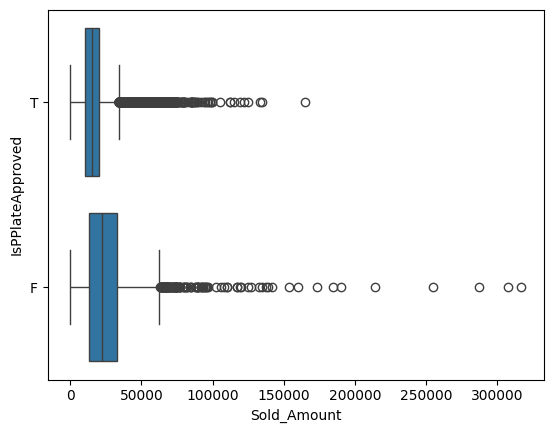

In [125]:
# df_train['IsPPlateApproved'].value_counts()

sns.boxplot(data=df_train, x="Sold_Amount", y="IsPPlateApproved");

### SaleCategory

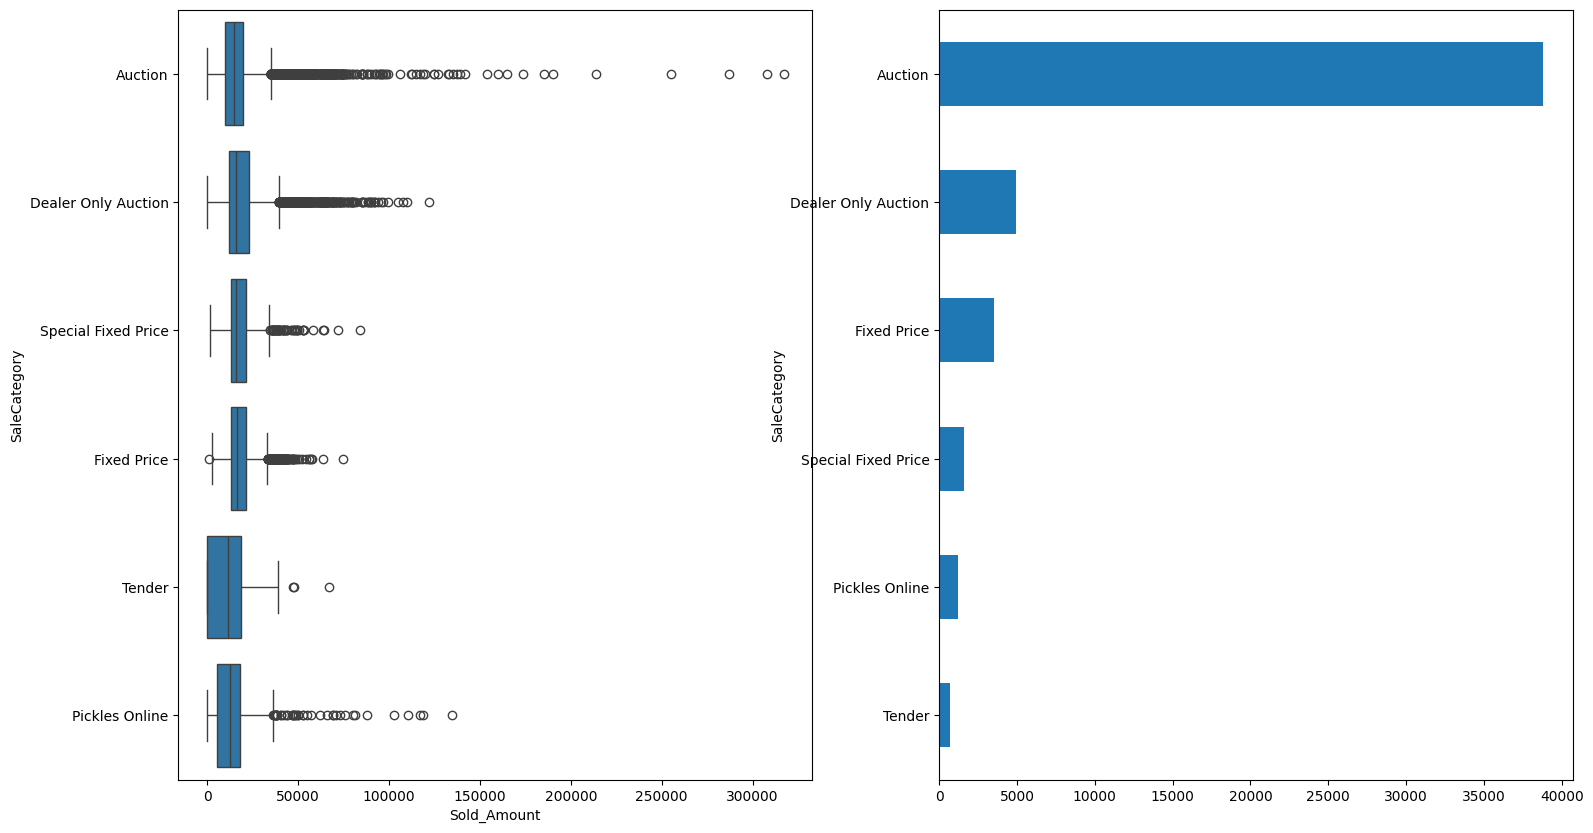

In [168]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.boxplot(data=df_train, x="Sold_Amount", y="SaleCategory");

plt.subplot(1,2,2)
df_train['SaleCategory'].value_counts().sort_values().plot.barh();

In [147]:
(df_train['SaleCategory'].value_counts() / df_train.shape[0]) * 100

SaleCategory
Auction                76.530451
Dealer Only Auction     9.673793
Fixed Price             6.936336
Special Fixed Price     3.165431
Pickles Online           2.34301
Tender                  1.349006
Name: count, dtype: Float64

### Mileage

In [156]:
df_train[['AverageKM', 'GoodKM', 'KM']].describe()

,AverageKM,GoodKM,KM
count,50703,50703,50702
unique,90,78,43678
top,180,140,0
freq,3940,4029,48


### Fuel Efficiency
'FuelUrban', 'FuelExtraurban', 'FuelCombined'

In [153]:
## Seems these values are highly correlated, will just use FuelCombined
df_train[['FuelUrban', 'FuelExtraurban', 'FuelCombined']].corr()

,FuelUrban,FuelExtraurban,FuelCombined
FuelUrban,1.000000,0.884646,0.908528
FuelExtraurban,0.884646,1.000000,0.923046
FuelCombined,0.908528,0.923046,1.000000


### Color

In [167]:
df_train['Colour'].value_counts()[:20]

Colour
White                      15738
Silver                      4921
Blue                        2776
Black                       1964
Grey                        1568
040 - Glacier White (T)     1460
Red                         1293
Green                        958
Heron White                  861
061 - Diamond White (T)      801
Winter White                 781
1F7 - Silver Pearl (T)       633
Gold                         566
Lightning Strike             472
Burgundy                     465
1G3 - Graphite (T)           415
058 - White solid (T)        412
1D4 - Silver Ash (T)         398
3R3 - Wildfire (T)           369
Maroon                       334
Name: count, dtype: Int64

### Branch

In [183]:
df_train['Branch'].value_counts()

Branch
Belmore (NSW)                15188
Sunshine (VIC)                6909
Geebung (QLD)                 5729
Balcatta (WA)                 4722
Adelaide (SA)                 3749
Canberra (ACT)                2869
Newcastle (NSW)               2440
Hobart (TAS)                  2327
Tullamarine (VIC)             1953
Townsville (QLD)              1421
Darwin (NT)                   1359
Dubbo (NSW)                    600
Rundles Wagga Wagga (NSW)      446
Welshpool (WA)                 428
Tamworth (NSW)                 398
Perth (WA)                      87
Alice Springs (NT)              59
Albany (WA)                     19
Name: count, dtype: Int64

### BuildCountryOriginDescription

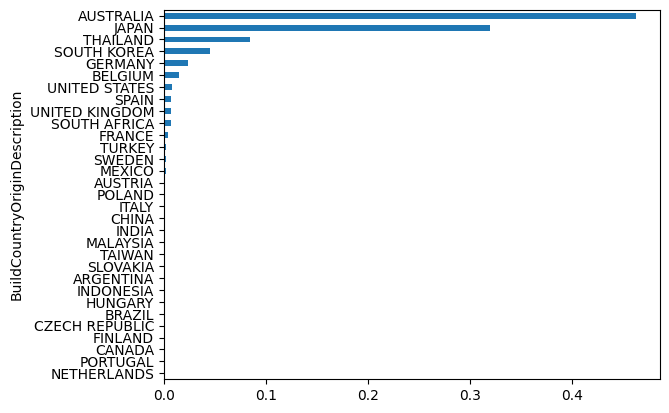

In [201]:
df_train['BuildCountryOriginDescription'].value_counts(normalize=True).sort_values().plot.barh();

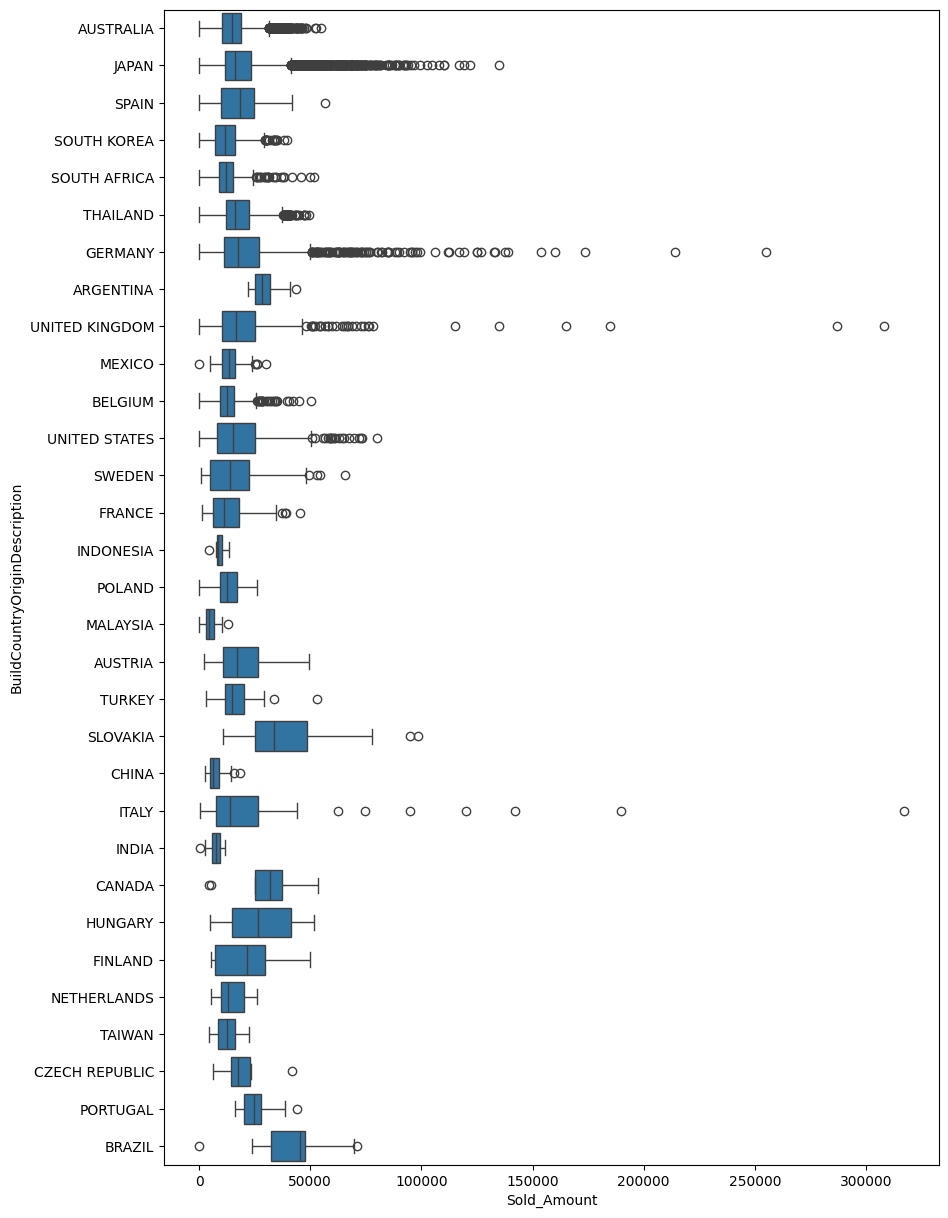

In [197]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df_train, x="Sold_Amount", y="BuildCountryOriginDescription");

### LimitedEdition

In [263]:
df_train['LimitedEdition'].value_counts()

LimitedEdition
F    49893
T      811
Name: count, dtype: Int64

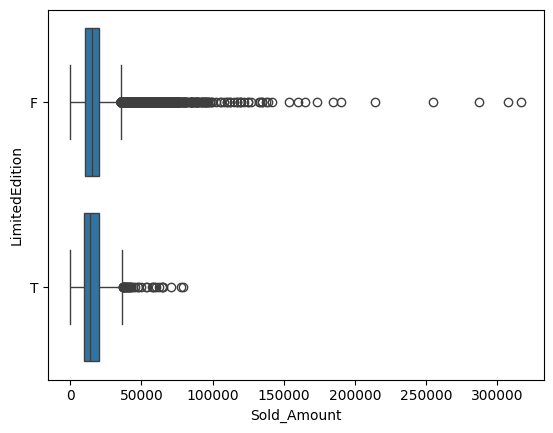

In [264]:
# plt.figure(figsize=(10,15))
sns.boxplot(data=df_train, x="Sold_Amount", y="LimitedEdition");

### ModelCode

In [206]:
df_train['ModelCode'].value_counts()[:20]

ModelCode
ACV40R-DEADKQ     1091
8VK69-114          688
8VK69114           656
ZRE152R-AEPDKQ     564
GSV40R-JETDKQ      562
8VK35-114          455
ASV50R-DETDKQ      432
ZRE152R-AHPDKQ     429
8EK69-114          423
18133              411
18333              396
18863              329
KUN26R-PRMDYQ      326
18833              317
8EK35-178          316
AHV40R-DEXDBQ      310
8EK69-178          304
8VK69614           302
ACA33R-ANPXKQ      271
NCP93R-BEPRKQ      266
Name: count, dtype: Int64

### TyreSize and RimDesc

In [241]:
# df_train[['FrontTyreSize', 'RearTyreSize', 'FrontRimDesc', 'RearRimDesc']]

## Is the front and rear tyre the same?
# (df_train['FrontTyreSize'] != df_train['RearTyreSize']).sum()

## Is the front and rear rim the same?
# df_train[(df_train['FrontRimDesc'] != df_train['RearRimDesc'])]


## Filter more columns

In [287]:
df_train_slim = df_train[[
                    'Make',
                    'Model',
                    'YearGroup',
                    'LimitedEdition',
                    'BadgeDescription',
                    'BodyStyleDescription',
                    'DriveCode',
                    'GearTypeDescription',
                    'GearLocationDescription',
                    'GearNum',
                    'DoorNum',
                    'EngineSize',
                    'Cylinders',
                    'FuelTypeDescription',
                    'InductionDescription',
                    'FuelCapacity',
                    'FuelDeliveryDescription',
                    'MethodOfDeliveryDescription',
                    'GrossVehicleMass',
                    'WheelBase',
                    'Height',
                    'Length',
                    'Width',
                    'KerbWeight',
                    'TareMass',
                    'PayLoad',
                    'Power',
                    'Torque',
                    'RonRating',
                    'SeatCapacity',
                    'ModelCode',
                    'BuildCountryOriginDescription',
                    'ValvesCylinder',
                    'EngineCycleDescription',
                    'EngineConfigurationDescription',
                    'EngineLocation',
                    'FrontTyreSize',
                    'RearTyreSize',
                    'FrontRimDesc',
                    'RearRimDesc',
                    'TowingBrakes',
                    'TowingNoBrakes',
                    'WarrantyYears',
                    'WarrantyKM',
                    'RegServiceMonths',
                    'CO2Combined',
                    'FuelCombined',
                    'AncapRating',
                    'VFactsClass',
                    'VFactsSegment',
                    'VFactsPrice',
                    'NewPrice',
                    'Colour',
                    'Branch',
                    'Age_Comp_Months',
                    'SaleCategory',
                    'KM',
                    'Sold_Amount'
                    ]].copy()

df_train_slim.head()

,Make,Model,YearGroup,LimitedEdition,BadgeDescription,BodyStyleDescription,DriveCode,GearTypeDescription,GearLocationDescription,GearNum,...,VFactsClass,VFactsSegment,VFactsPrice,NewPrice,Colour,Branch,Age_Comp_Months,SaleCategory,KM,Sold_Amount
0,Holden,Commodore,2008,F,Omega,Sedan,RWD,Automatic,Floor,4,...,Passenger,Large,< $70K,34790,White,Perth (WA),93,Auction,227878,2000.0
1,Holden,Commodore,1993,F,Executive,Wagon,RWD,Automatic,Floor,4,...,Passenger,Large,< $70K,27978,Red,Belmore (NSW),86,Auction,153091,6800.0
2,Toyota,RAV4,2012,F,CV,Wagon,4XO,Manual,Floor,5,...,SUV,Medium,< $60K,31990,040 - Glacier White (T),Sunshine (VIC),16,Dealer Only Auction,27374,22900.0
3,Holden,Commodore,2007,F,Executive,Wagon,RWD,Automatic,Floor,4,...,Passenger,Large,< $70K,35990,Quicksilver,Belmore (NSW),48,Auction,99452,10500.0
4,Toyota,Tarago,2007,F,GLi,Wagon,FWD,Sports Automatic,Dash,4,...,Passenger,People Movers,< $60K,49490,Silver,Hobart (TAS),28,Special Fixed Price,44355,31320.0


In [305]:
df_train_slim['Sold_Amount'].dropna(inplace=True)
df_train_slim['LimitedEdition'] = df_train_slim['LimitedEdition'].map({'F':False, 'T':True})

In [304]:
df_train_slim['EngineConfigurationDescription'].value_counts()

EngineConfigurationDescription
In-line       31621
V60            9706
V90            6160
Horizontal     1272
V75              36
V15              24
V                14
V72               5
V65               5
W72/15            1
Name: count, dtype: Int64

### Convert Columns to proper type

In [309]:
dtypes = {
    'Make' : 'category',
    'Model' : 'category',
    'YearGroup' : 'Int32',
    # 'LimitedEdition' : bool,
    'BadgeDescription' : 'category',
    'BodyStyleDescription' : 'category',
    'DriveCode':'category',
    'GearTypeDescription' : 'category',
    'GearLocationDescription' : 'category',
    'GearNum' : 'Int32',
    'DoorNum' : 'Int32',
    'EngineSize' : 'Int32',
    'Cylinders': 'Int32',
    'FuelTypeDescription': 'category',
    'InductionDescription': 'category',
    'FuelCapacity': 'Int32',
    'FuelDeliveryDescription': 'category',
    'MethodOfDeliveryDescription': 'category',
    'GrossVehicleMass': 'Int32',
    'WheelBase':'Int32',
    'Height': 'Int32',
    'Length': 'Int32',
    'Width': 'Int32',
    'KerbWeight': 'Int32',
    'TareMass': 'Int32',
    'PayLoad': 'Int32',
    'Power':float,
    'Torque': 'Int32',
    'RonRating': 'Int32',
    'SeatCapacity': 'Int32',
    'ModelCode': 'category',
    'BuildCountryOriginDescription':'category',
    'ValvesCylinder': 'Int32',
    'EngineCycleDescription': 'category',
    'EngineConfigurationDescription': 'category',
    'EngineLocation': 'category',
    'FrontTyreSize': 'category',
    'RearTyreSize': 'category',
    'FrontRimDesc': 'category',
    'RearRimDesc': 'category',
    'TowingBrakes': 'Int32',
    'TowingNoBrakes': 'Int32',
    'WarrantyYears': 'category',
    'WarrantyKM': 'Int32',
    'RegServiceMonths': 'Int32',
    'CO2Combined': 'Int32',
    'FuelCombined': float,
    'AncapRating': 'Int32',
    'VFactsClass': 'category',
    'VFactsSegment': 'category',
    'VFactsPrice': 'category',
    'NewPrice': 'Int32',
    'Colour': 'category',
    'Branch': 'category',
    'Age_Comp_Months': 'Int32',
    'SaleCategory': 'category',
    'KM':'Int32',
    # 'Sold_Amount': float
}

In [311]:
df_train_slim = df_train_slim.astype(dtypes)

In [317]:
df_train_slim.to_csv("dataset/df_train_slim.csv", index=False)